In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [31]:
# df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
df = pd.read_csv("./vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [32]:
year = df["Year"]

In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.shape

(16598, 11)

In [7]:
df = df.dropna()

In [8]:
df.shape

(16291, 11)

In [9]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

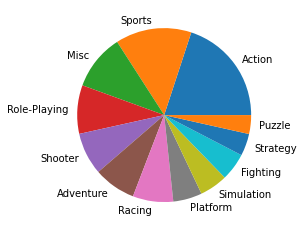

In [11]:
genre = df.Genre.value_counts()
plt.pie(x=genre, labels=genre.index)
plt.show()

In [12]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y') 

In [13]:
year = df.sort_values("Year")

In [14]:
unique_year = df['Year'].sort_values()
unique_year = unique_year.unique()
dict = {}
for i in unique_year:
    data = df[df['Year'] == i]
    dict[i] = data['NA_Sales'].sum()
    
px.bar(x=dict.keys(), y=dict.values(), labels={"x": "Years", "y": "NA Sales"})

In [15]:
unique_year = df['Year'].sort_values()
unique_year = unique_year.unique()
dict = {}
for i in unique_year:
    data = df[df['Year'] == i]
    dict[i] = data['EU_Sales'].sum()
    
px.bar(x=dict.keys(), y=dict.values(), labels={"x": "Years", "y": "EU Sales"})

In [16]:
unique_year = df['Year'].sort_values()
unique_year = unique_year.unique()
dict = {}
for i in unique_year:
    data = df[df['Year'] == i]
    dict[i] = data['JP_Sales'].sum()
    
px.bar(x=dict.keys(), y=dict.values(), labels={"x": "Years", "y": "JP Sales"})

In [17]:
unique_year = df['Year'].sort_values()
unique_year = unique_year.unique()
dict = {}
for i in unique_year:
    data = df[df['Year'] == i]
    dict[i] = data['Other_Sales'].sum()
    
px.bar(x=dict.keys(), y=dict.values(), labels={"x": "Years", "y": "Others Sales"})

In [18]:
unique_year = df['Year'].sort_values()
unique_year = unique_year.unique()
dict = {}
for i in unique_year:
    data = df[df['Year'] == i]
    dict[i] = data['Global_Sales'].sum()
    
px.bar(x=dict.keys(), y=dict.values(), labels={"x": "Years", "y": "Global Sales"})

In [19]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [20]:
X = df[["Rank", "Name", "Platform", "Year", "Genre", "Publisher"]]
y = df["Global_Sales"]


In [33]:
import tensorflow as tf

X["Rank"] = np.array(X["Rank"], dtype = np.int32)
X["Year"] = year
for i in X.columns:
    print(np.dtype(X[i]))


int32
object
object
float64
object
object


In [29]:
import tensorflow as tf
X = tf.constant(X)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).